In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 36s 0us/step


In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 22s 14s/step - loss: 6.0823 - accuracy: 0.2708 - val_loss: 8.5873 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 19s 13s/step - loss: 5.9000 - accuracy: 0.3542 - val_loss: 4.9095 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 19s 13s/step - loss: 5.7641 - accuracy: 0.2708 - val_loss: 5.0247 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 16s 11s/step - loss: 3.5827 - accuracy: 0.3750 - val_loss: 1.0961 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 17s 12s/step - loss: 1.6835 - accuracy: 0.5312 - val_loss: 2.9236 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 19s 12s/step - loss: 2.9555 - accuracy: 0.4479 - val_loss: 2.5853 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 16s 12s/step - loss: 2.8872 - accuracy: 0.4271 - val_loss: 1.1508 - val_accuracy: 0.4483
Epoch 8/50
2/2 [===========

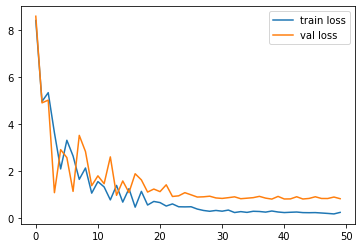

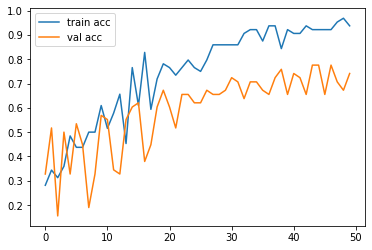

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:

y_pred = model.predict(test_set)


In [23]:
y_pred

array([[2.54812390e-01, 6.95003986e-01, 5.01836054e-02],
       [5.36915995e-02, 1.04718050e-02, 9.35836613e-01],
       [6.18712187e-01, 2.82430410e-01, 9.88573954e-02],
       [7.01877356e-01, 3.59210409e-02, 2.62201667e-01],
       [6.26528382e-01, 3.63143057e-01, 1.03285145e-02],
       [4.14042287e-02, 4.59605604e-01, 4.98990208e-01],
       [1.85625926e-01, 4.20029581e-01, 3.94344568e-01],
       [5.79823777e-02, 6.00836635e-01, 3.41180950e-01],
       [4.60494570e-02, 5.81175029e-01, 3.72775495e-01],
       [2.30732970e-02, 9.06556070e-01, 7.03706741e-02],
       [1.94312166e-02, 8.16533327e-01, 1.64035469e-01],
       [9.02893841e-02, 1.30750343e-01, 7.78960288e-01],
       [9.24768984e-01, 4.48322110e-02, 3.03988643e-02],
       [4.29328457e-02, 8.32328677e-01, 1.24738418e-01],
       [3.38868052e-01, 4.50575352e-01, 2.10556597e-01],
       [1.17548116e-04, 9.97905374e-01, 1.97710888e-03],
       [1.42367301e-03, 7.99851775e-01, 1.98724523e-01],
       [1.54098694e-03, 9.91851

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [28]:
img_data

NameError: name 'img_data' is not defined

In [29]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[0.06256898, 0.08717006, 0.8502609 ]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a

array([2], dtype=int64)